In [29]:
from sklearn import datasets
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
iris = datasets.load_iris()
df = pd.DataFrame( iris.data , columns=iris.feature_names)
df['TARGET'] = iris.target
print(df.shape)
df.columns = [col.replace(' ', '_') for col in df.columns]
df = df[df.TARGET.isin([0, 1])]

X = df.iloc[:,:-1]
y = df.TARGET

df.head()


(150, 5)


,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),TARGET
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
X.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y.value_counts()

1    50
0    50
Name: TARGET, dtype: int64

In [32]:
import xgboost as xgb
params  = {'objective': 'binary:logistic',
           'eval_metric': 'logloss', 
          #'num_class': 2
          } 

bst = xgb.train(params=params, dtrain=xgb.DMatrix(X, y), 
                evals=[(xgb.DMatrix(X, y), 'train'), (xgb.DMatrix(X[:100], y[:100]), 'vali')], 
                early_stopping_rounds=10,
                num_boost_round=100, verbose_eval=True,
                #callbacks=[xgb.callback.print_evaluation(show_stdv=False)]
               )   

#bst.predict(xgb.DMatrix(test.values)) 

[0]	train-logloss:0.453463	vali-logloss:0.453463
Multiple eval metrics have been passed: 'vali-logloss' will be used for early stopping.

Will train until vali-logloss hasn't improved in 10 rounds.
[1]	train-logloss:0.315917	vali-logloss:0.315917
[2]	train-logloss:0.227687	vali-logloss:0.227687
[3]	train-logloss:0.167921	vali-logloss:0.167921
[4]	train-logloss:0.12611	vali-logloss:0.12611
[5]	train-logloss:0.09623	vali-logloss:0.09623
[6]	train-logloss:0.074543	vali-logloss:0.074543
[7]	train-logloss:0.058603	vali-logloss:0.058603
[8]	train-logloss:0.046759	vali-logloss:0.046759
[9]	train-logloss:0.037864	vali-logloss:0.037864
[10]	train-logloss:0.03111	vali-logloss:0.03111
[11]	train-logloss:0.025925	vali-logloss:0.025925
[12]	train-logloss:0.021898	vali-logloss:0.021898
[13]	train-logloss:0.018732	vali-logloss:0.018732
[14]	train-logloss:0.018732	vali-logloss:0.018732
[15]	train-logloss:0.018732	vali-logloss:0.018732
[16]	train-logloss:0.018732	vali-logloss:0.018732
[17]	train-loglos

In [33]:
print(f'Best: score:{bst.best_score}, iteration:{bst.best_iteration}, ntree_limit:{bst.best_ntree_limit}')
bst.predict(xgb.DMatrix(X))[:10]

Best: score:0.018732, iteration:13, ntree_limit:14


array([0.01855747, 0.01855747, 0.01855747, 0.01855747, 0.01855747,
       0.01855747, 0.01855747, 0.01855747, 0.01855747, 0.01855747],
      dtype=float32)

In [34]:
bst.predict(xgb.DMatrix(X), ntree_limit=bst.best_iteration)[:10]

array([0.02165981, 0.02165981, 0.02165981, 0.02165981, 0.02165981,
       0.02165981, 0.02165981, 0.02165981, 0.02165981, 0.02165981],
      dtype=float32)

In [35]:
bst.predict(xgb.DMatrix(X), ntree_limit=bst.best_ntree_limit)[:10]

array([0.01855746, 0.01855746, 0.01855746, 0.01855746, 0.01855746,
       0.01855746, 0.01855746, 0.01855746, 0.01855746, 0.01855746],
      dtype=float32)

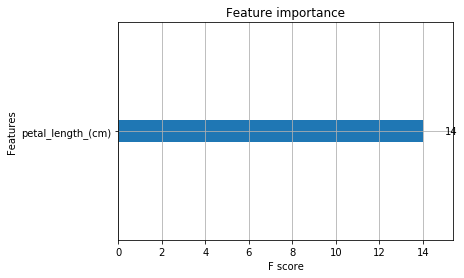

In [36]:
%matplotlib inline
xgb.plot_importance(bst)

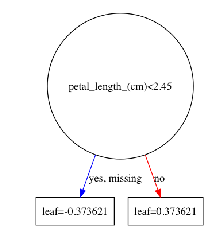

In [37]:
xgb.plot_tree(bst, num_trees=2)

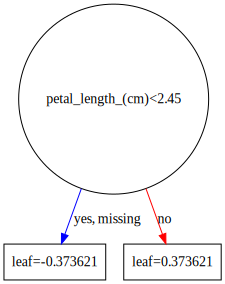

In [38]:
xgb.to_graphviz(bst, num_trees=2)

In [39]:
# Xgb with CV

In [40]:
print ('running cross validation, disable standard deviation display')
# 交叉验证，只输入下面信息：
# [iteration]  metric_name:mean_value
res = xgb.cv(params, xgb.DMatrix(X, y), 
             num_boost_round=100, nfold=5,
             metrics={'error', 'logloss'}, seed = 0,
             callbacks=[xgb.callback.print_evaluation(show_stdv=True),
                        xgb.callback.early_stop(3)]
            )

running cross validation, disable standard deviation display
[0]	train-error:0+0	train-logloss:0.457151+8.15843e-06	test-error:0+0	test-logloss:0.457588+0.000528419
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 3 rounds.
[1]	train-error:0+0	train-logloss:0.32051+8.2365e-06	test-error:0+0	test-logloss:0.321055+0.000661706
[2]	train-error:0+0	train-logloss:0.232463+8.2365e-06	test-error:0+0	test-logloss:0.233031+0.000688852
[3]	train-error:0+0	train-logloss:0.172621+8.2365e-06	test-error:0+0	test-logloss:0.173179+0.000677692
[4]	train-error:0+0	train-logloss:0.130628+8.53229e-06	test-error:0+0	test-logloss:0.131164+0.000649797
[5]	train-error:0+0	train-logloss:0.100518+8.93532e-06	test-error:0+0	test-logloss:0.101025+0.000615166
[6]	train-error:0+0	train-logloss:0.0785786+8.93532e-06	test-error:0+0	test-logloss:0.0790562+0.000577511
[7]	train-error:0+0	train-logloss:0.0623814+9.30806e-06	test-erro

In [41]:
print ('running cross validation, disable standard deviation display')
# 交叉验证，只输入下面信息：
# [iteration]  metric_name:mean_value
res = xgb.cv(params, xgb.DMatrix(X, y), 
             num_boost_round=100, nfold=5,
             metrics={'error', 'logloss'}, seed = 0,
             callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                        xgb.callback.early_stop(3)]
            )

running cross validation, disable standard deviation display
[0]	train-error:0	train-logloss:0.457151	test-error:0	test-logloss:0.457588
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 3 rounds.
[1]	train-error:0	train-logloss:0.32051	test-error:0	test-logloss:0.321055
[2]	train-error:0	train-logloss:0.232463	test-error:0	test-logloss:0.233031
[3]	train-error:0	train-logloss:0.172621	test-error:0	test-logloss:0.173179
[4]	train-error:0	train-logloss:0.130628	test-error:0	test-logloss:0.131164
[5]	train-error:0	train-logloss:0.100518	test-error:0	test-logloss:0.101025
[6]	train-error:0	train-logloss:0.0785786	test-error:0	test-logloss:0.0790562
[7]	train-error:0	train-logloss:0.0623814	test-error:0	test-logloss:0.0628274
[8]	train-error:0	train-logloss:0.0502794	test-error:0	test-logloss:0.050694
[9]	train-error:0	train-logloss:0.0411324	test-error:0	test-logloss:0.0415172
[10]	train-error:0	train-

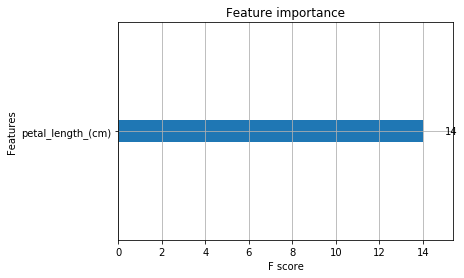

In [53]:
from xgboost import plot_importance
plot_importance(bst)

In [50]:

def print_imp_list( train, clf, order_by_wight=True, show_zero=True):
    print(dir(clf.boost))
    if hasattr(clf, 'feature_importances_'):
        imp_item = dict(zip(train.columns, clf.feature_importances_))

        imp_list = sorted(imp_item.items(), key=lambda imp: imp[1], reverse=True)

        # for key, value in imp_list:
        #     if value > 0:
        #         print(f'Import {value}: {key}')
        #         print(train[str(key)].dtype.name)
        #     else:
        #         print(f'zeor imp:{key}')
        #

        zero_list = [key for key, value in imp_list if value==0]

        print(f'Full List:{len(train.columns)}, Zero List:{len(zero_list)}, ')


        imp_list = [(key, value, train[key].dtype.name) for key, value in imp_list if value>0]

        if order_by_wight :
            imp_list = sorted(imp_list, key=lambda imp: imp[1], reverse=True)
        else:
            imp_list = sorted(imp_list, key=lambda imp: imp[2])

        import_sn = 0
        for (key, value, dtype) in imp_list:
            import_sn += 1
            print("%03d: %s, %s, %s" % ( import_sn, str(key).ljust(35), str(value).ljust(5), dtype))

        print(f'Full List:{len(train.columns)}, Zero List:{len(zero_list)}, ')

print_imp_list(X, bst)


['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
